In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

#Importing Dataset

In [111]:
data = pd.read_csv('output.csv')
data.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


##Describing the Data

In [112]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB
None


In [113]:
print("Shape - ",data.shape)

Shape -  (104, 7)


In [114]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,104.0,52.500000,30.166206,1.0000,26.750000,52.50000,78.250000,104.0000
%Red Pixel,104.0,45.654175,2.816294,38.7968,43.911375,45.38535,46.968325,54.6478
%Green pixel,104.0,28.875507,1.554275,25.1403,27.871300,28.94875,29.887275,32.3681
%Blue pixel,104.0,25.470325,1.984671,19.5413,24.896425,25.95320,26.721600,29.8414
Hb,104.0,12.150962,2.512957,2.8000,10.650000,12.60000,14.000000,16.3000


In [115]:
# Extracting all types of columns.
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns
    num_cols=data.select_dtypes("number").columns
    disc_cols=data.select_dtypes(include=("int64")).columns
    conts_cols=data.select_dtypes(include=("float64")).columns
    Nomial_cols=data.nunique()[data.nunique()<3]
print(f"Object Columns -  {obj_cols}\nNumerical_columns - {num_cols} \nDiscrete_columns - {disc_cols} \nContinous_cols - {conts_cols} \nNominal Columns - {Nomial_cols}")

Object Columns -  Index(['Sex', 'Anaemic'], dtype='object')
Numerical_columns - Index(['Number', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb'], dtype='object') 
Discrete_columns - Index(['Number'], dtype='object') 
Continous_cols - Index(['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb'], dtype='object') 
Nominal Columns - Anaemic    2
dtype: int64


In [116]:
#Checking for NULL values.
data.isna().mean()

Number          0.0
Sex             0.0
%Red Pixel      0.0
%Green pixel    0.0
%Blue pixel     0.0
Hb              0.0
Anaemic         0.0
dtype: float64

#Cleaning the Dataset

In [117]:
#Dropping the 'number' column as it is useless.
data=data.drop(columns="Number",axis=1)
data

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,F,49.9999,29.2860,20.7141,14.5,Yes
100,M,42.2324,30.6757,27.0919,6.3,Yes
101,F,45.6064,31.9084,22.4852,12.7,No
102,M,45.2095,29.2769,25.5136,13.4,No


In [118]:
# Removing special characters from column names.
data.columns = data.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
print(data)

    Sex  RedPixel  Greenpixel  Bluepixel    Hb Anaemic
0     M   43.2555     30.8421    25.9025   6.3     Yes
1     F   45.6033     28.1900    26.2067  13.5      No
2    F    45.0107     28.9677    26.0215  11.7      No
3     F   44.5398     28.9899    26.4703  13.5      No
4    M    43.2870     30.6972    26.0158  12.4      No
..   ..       ...         ...        ...   ...     ...
99   F    49.9999     29.2860    20.7141  14.5     Yes
100  M    42.2324     30.6757    27.0919   6.3     Yes
101   F   45.6064     31.9084    22.4852  12.7      No
102  M    45.2095     29.2769    25.5136  13.4      No
103   F   43.5706     29.8094    26.6199  12.2      No

[104 rows x 6 columns]


In [119]:
#Number of unique values in each column.
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>Sex column  :  
['M' 'F' 'F ' 'M ']
**************************************************
All items in the ---->>>RedPixel column  :  
[43.2555 45.6033 45.0107 44.5398 43.287  45.0994 43.1457 43.6103 45.0423
 46.5143 45.3506 44.4062 44.9642 45.0484 46.9942 45.5842 42.5358 44.0957
 45.7104 40.9365 44.9116 43.4225 43.3019 47.6372 45.6906 43.4098 44.4252
 44.3297 47.8913 42.2473 44.2572 48.6358 42.1652 45.4434 42.1528 45.2588
 46.4081 47.2275 47.3642 46.1449 41.7122 47.9777 46.7628 44.9526 44.1868
 46.9428 48.8523 45.7581 48.5356 45.5833 45.9659 44.0418 43.9633 47.1003
 46.0477 46.2133 49.1475 45.7986 40.6395 50.3562 43.9224 45.0693 45.8483
 43.4837 38.7968 45.4201 44.1609 42.5892 46.9597 44.1995 41.133  52.9108
 50.4976 44.72   53.9113 49.5899 45.9707 42.4532 44.3346 43.8783 42.8269
 43.1335 45.4735 50.4801 46.255  46.7979 46.5811 54.6478 48.8763 46.3745
 43.1425 49.5037 47.7549 42.5314 52.154  51.5802 48.3681 47.326  49.9999
 42.2324 45.6064 45.2095 43.5706]
*******

# Processing on the Dataset

In [120]:
# Convert all Categorical columns into Numerical columns :
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
print(data)

     Sex  RedPixel  Greenpixel  Bluepixel  Hb  Anaemic
0      2        17          91         50   2        1
1      0        56          33         58  44        0
2      1        43          52         54  27        0
3      0        38          55         64  44        0
4      3        18          89         53  33        0
..   ...       ...         ...        ...  ..      ...
99     1        94          62          6  50        1
100    3         7          88         88   2        1
101    0        57          99         10  36        0
102    3        48          61         41  43        0
103    0        23          73         72  32        0

[104 rows x 6 columns]


In [121]:
# Standardize the data
features=["Sex","Hb","Anaemic","Bluepixel","Greenpixel","RedPixel"]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data[features])
print(x_scaled)

[[ 0.38728003 -1.84966031  1.73205081 -0.03670505  1.34364567 -1.13952745]
 [-1.36389925  0.66882979 -0.57735027  0.23354805 -0.61310727  0.17538673]
 [-0.48830961 -0.35055906 -0.57735027  0.0984215   0.027898   -0.262918  ]
 [-1.36389925  0.66882979 -0.57735027  0.43623787  0.12910936 -0.43149674]
 [ 1.26286967  0.00922524 -0.57735027  0.06463986  1.27617143 -1.1058117 ]
 [ 0.38728003  1.62825459 -0.57735027  1.11187061 -0.81552999 -0.128055  ]
 [-1.36389925 -1.54984006  1.73205081  0.80783588  1.00627447 -1.17324319]
 [-0.48830961 -1.01016361 -0.57735027  1.38212371  0.1965836  -0.90351721]
 [-1.36389925  0.36900954 -0.57735027 -0.1718316   0.26405784 -0.22920225]
 [-1.36389925 -1.19005576  1.73205081  0.13220314 -1.05168983  0.68112295]
 [-1.36389925  0.12915334 -0.57735027 -0.30695814  0.23032072 -0.02690776]
 [-1.36389925  1.38839839 -0.57735027  0.77405424 -0.00583912 -0.49892823]
 [-1.36389925 -1.90962436  1.73205081 -1.11771743  1.20869719 -0.29663374]
 [ 1.26286967 -1.42991196

In [122]:
#Outlier Detection
features=["Sex","RedPixel","Greenpixel","Bluepixel","Hb"]
for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f"There are no outliers in {col} feature.")
    else:
        print(f"There are {col} outliers in this feature.")

    print(f"Q1 of {col} --->>> {Q1_col} \nQ3 of {col} ---->>> {Q3_col} \nIQR--->>{iqr}\nLow Limit--->>>{low_limit} \nUpper Limit--->>> {upper_limit} \nOutliers---->>> {outlier} \nNumber of outliers --->>> {len(outlier)}")
    print("-"*25)

There are no outliers in Sex feature.
Q1 of Sex --->>> 0.75 
Q3 of Sex ---->>> 3.0 
IQR--->>2.25
Low Limit--->>>-2.625 
Upper Limit--->>> 6.375 
Outliers---->>> [] 
Number of outliers --->>> 0
-------------------------
There are no outliers in RedPixel feature.
Q1 of RedPixel --->>> 25.75 
Q3 of RedPixel ---->>> 76.25 
IQR--->>50.5
Low Limit--->>>-50.0 
Upper Limit--->>> 152.0 
Outliers---->>> [] 
Number of outliers --->>> 0
-------------------------
There are no outliers in Greenpixel feature.
Q1 of Greenpixel --->>> 25.75 
Q3 of Greenpixel ---->>> 76.25 
IQR--->>50.5
Low Limit--->>>-50.0 
Upper Limit--->>> 152.0 
Outliers---->>> [] 
Number of outliers --->>> 0
-------------------------
There are no outliers in Bluepixel feature.
Q1 of Bluepixel --->>> 25.75 
Q3 of Bluepixel ---->>> 76.25 
IQR--->>50.5
Low Limit--->>>-50.0 
Upper Limit--->>> 152.0 
Outliers---->>> [] 
Number of outliers --->>> 0
-------------------------
There are no outliers in Hb feature.
Q1 of Hb --->>> 18.75 
Q3 o

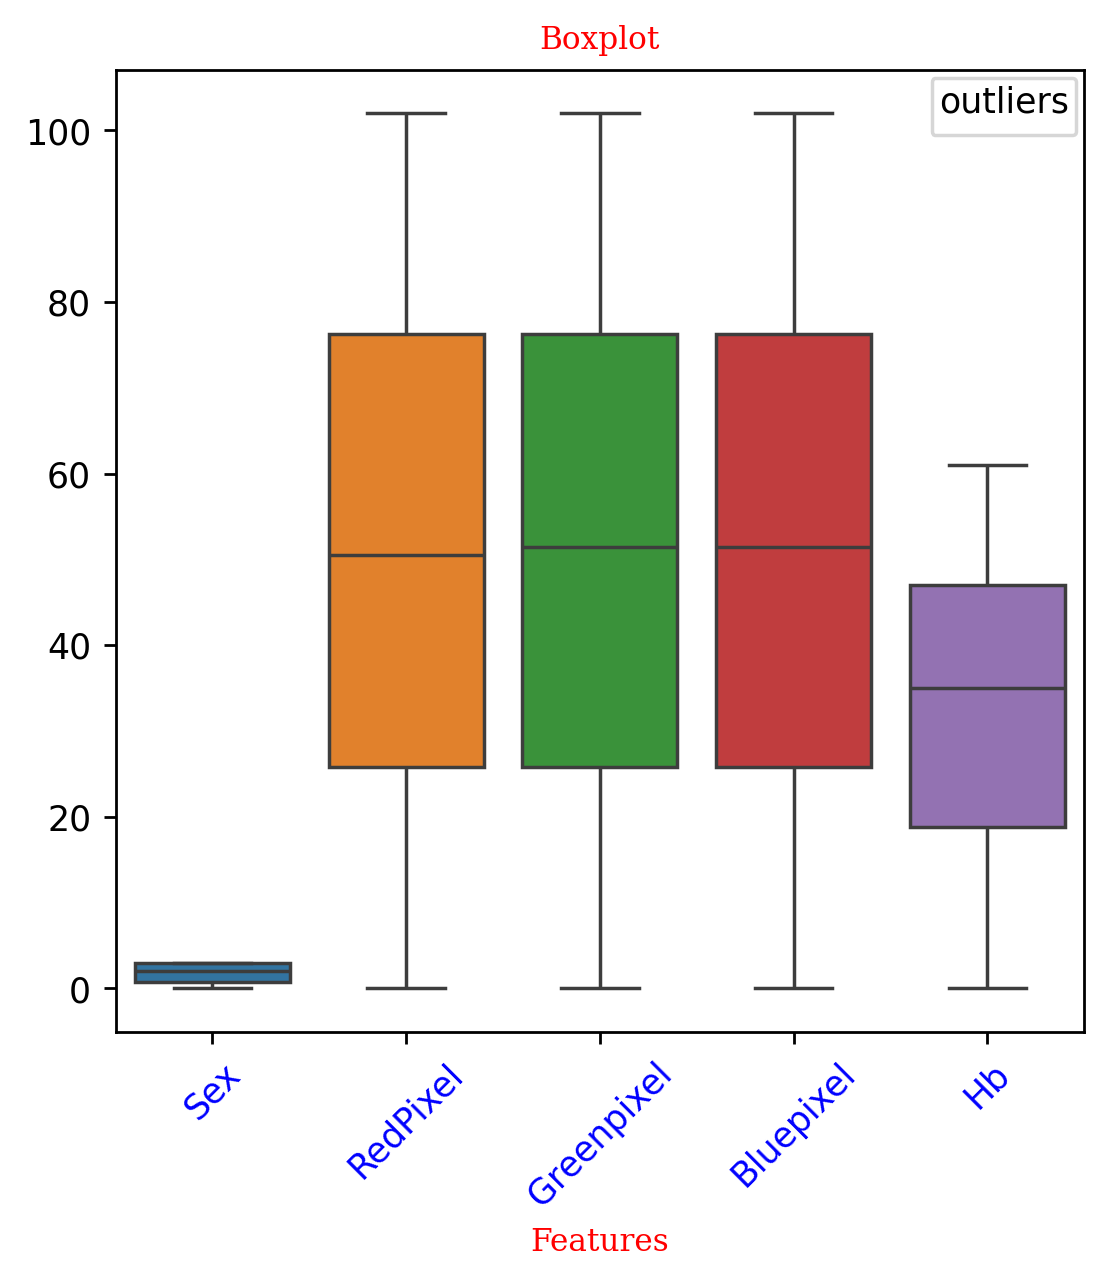

In [123]:
# Boxplot
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(5,5),dpi=250)
plt.title("Boxplot",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

In [124]:
# Check if there are duplicate values in the data and remove it if found any.  :
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)

Number of duplicates ----->>>  0


In [125]:
data.drop(duplicated_features)

,Sex,RedPixel,Greenpixel,Bluepixel,Hb,Anaemic
1,0,56,33,58,44,0
2,1,43,52,54,27,0
3,0,38,55,64,44,0
4,3,18,89,53,33,0
5,2,47,27,84,60,0
...,...,...,...,...,...,...
99,1,94,62,6,50,1
100,3,7,88,88,2,1
101,0,57,99,10,36,0
102,3,48,61,41,43,0


In [126]:
# Splitting the data for traning
x=data.drop(columns="Anaemic",axis=1)
y=data["Anaemic"]
print(np.shape(x),np.shape(y))
print(len(x),len(y))

(104, 5) (104,)
104 104


## Visualizationa to cover the Dataset

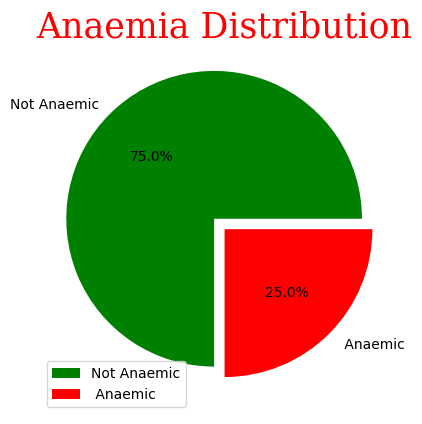

In [127]:
f={"family":"serif","size":25,"color":"r"}
plt.title("Anaemia Distribution",fontdict=f)
explicit=data["Anaemic"].value_counts()
plt.pie(x=explicit,labels=["Not Anaemic"," Anaemic"],colors=["g","r"],explode=[0.1,0],autopct='%1.1f%%')
plt.legend()
plt.show()


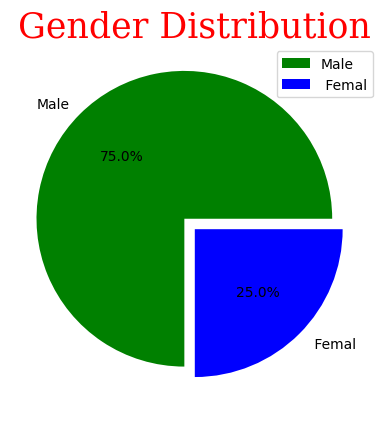

In [128]:
f={"family":"serif","size":25,"color":"r"}
plt.title("Gender Distribution",fontdict=f)
explicit=data["Anaemic"].value_counts()
plt.pie(x=explicit,labels=["Male"," Femal"],colors=["g","b"],explode=[0.1,0],autopct='%1.1f%%')
plt.legend()
plt.show()

<Figure size 7500x7500 with 0 Axes>

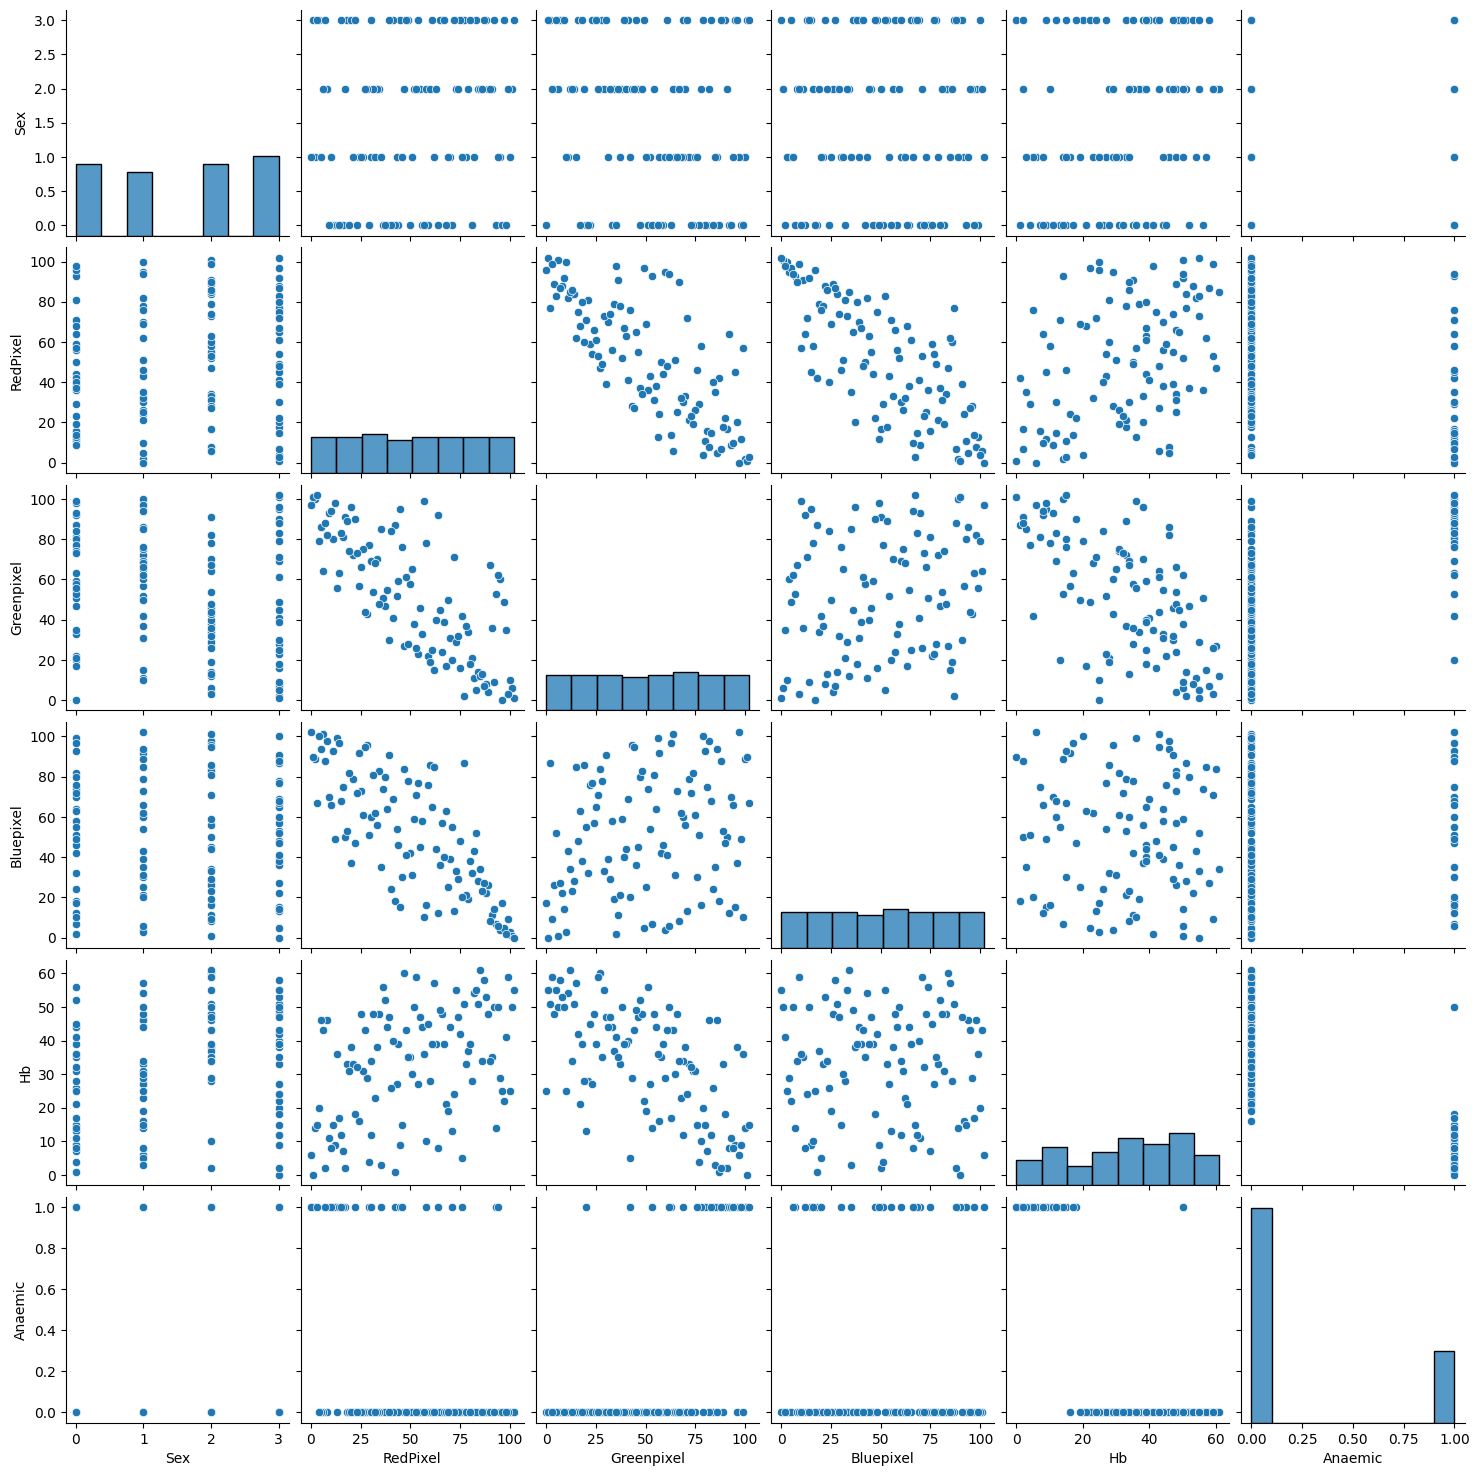

In [129]:
# Scatterplots & Barplots to cover on the discrete features
plt.figure(figsize=(25,25),dpi=300)
sns.pairplot(data.select_dtypes(include="int64"))

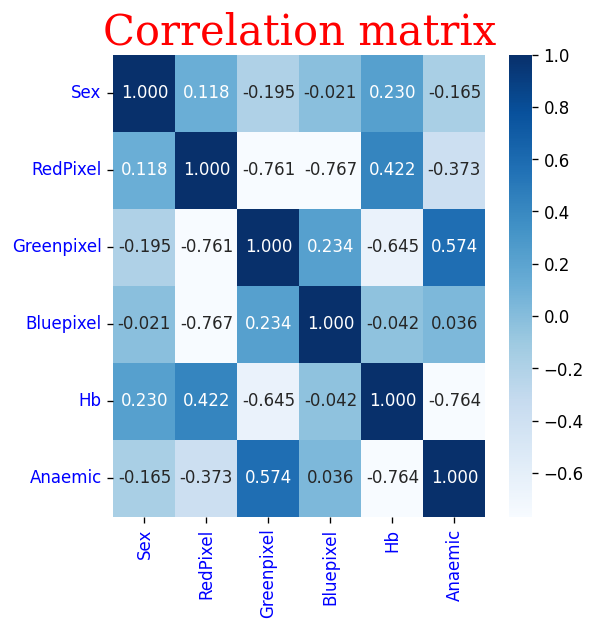

In [130]:
correlation=data.select_dtypes("number").corr()
plt.figure(figsize=(5,5),dpi=120)
plt.title("Correlation matrix",fontdict=f)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=90,color="b")
sns.heatmap(correlation,annot=True,fmt="0.03f",cmap='Blues')
plt.show()

In [131]:
# calcualte the Correlation with differt methods :
corr1=data.select_dtypes("number").corr(method="spearman")
print("Spearman Correlation --->> \n",corr1)
print("-"*50)
corr2=data.select_dtypes("number").corr(method="pearson")
print("Pearson Correlation --->> \n",corr2)
print("-"*50)
corr3=data.select_dtypes("number").corr(method="kendall")
print("Kendall Correlation -->> \n" ,corr3)

Spearman Correlation --->> 
                  Sex  RedPixel  Greenpixel  Bluepixel        Hb   Anaemic
Sex         1.000000  0.114882   -0.190144  -0.021241  0.234477 -0.159762
RedPixel    0.114882  1.000000   -0.761697  -0.765954  0.416622 -0.374648
Greenpixel -0.190144 -0.761697    1.000000   0.233390 -0.642041  0.575842
Bluepixel  -0.021241 -0.765954    0.233390   1.000000 -0.037332  0.035875
Hb          0.234477  0.416622   -0.642041  -0.037332  1.000000 -0.703247
Anaemic    -0.159762 -0.374648    0.575842   0.035875 -0.703247  1.000000
--------------------------------------------------
Pearson Correlation --->> 
                  Sex  RedPixel  Greenpixel  Bluepixel        Hb   Anaemic
Sex         1.000000  0.118287   -0.195429  -0.021336  0.230171 -0.165267
RedPixel    0.118287  1.000000   -0.761192  -0.766739  0.422188 -0.373406
Greenpixel -0.195429 -0.761192    1.000000   0.233631 -0.644724  0.574230
Bluepixel  -0.021336 -0.766739    0.233631   1.000000 -0.041577  0.035820
Hb  